In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential     #importa modelo Sequential
from keras.applications import vgg16    #importa rede VGG16
from keras.datasets import fashion_mnist
from keras.layers import InputLayer, Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

8


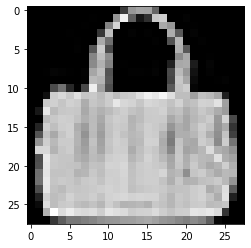

In [ ]:
# mostra uma determinada imagem da rede
def show_img(element):
  img = np.array(element, dtype='float')
  img = img.reshape((28,28))
  plt.imshow(img, cmap='gray')

show_img(X_train[4000])
print(y_train[4000])

In [ ]:
# define algumas variáveis úteis, normaliza conjunto de treino e transforma y's em categóricos
total_pixels = X_train.shape[1] * X_train.shape[2]

X_train_32f = X_train / 255
X_train_32f = X_train_32f.reshape(X_train_32f.shape[0], total_pixels).astype('float32')
print(X_train.shape)
X_test_32f  = X_test / 255
X_test_32f = X_test_32f.reshape(X_test_32f.shape[0], total_pixels).astype('float32')

y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

num_classes  = len(y_train_cat[0])

print("Number of pixels: ", total_pixels, "\nNumber of classes: ", num_classes, "\nShape of Train Data: ", X_train_32f.shape)

(60000, 28, 28)
Number of pixels:  784 
Number of classes:  10 
Shape of Train Data:  (60000, 784)


In [ ]:
y_train_cat.shape

(60000, 10)

In [ ]:
# cria a segunda rede descrita no enunciado

std_model = Sequential()
std_model.add(InputLayer(input_shape=total_pixels))
std_model.add(Dense(total_pixels, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(1024, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(2048, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(2048, activation='relu', kernel_initializer='normal'))
std_model.add(Dense(num_classes, activation='softmax', kernel_initializer='normal'))
std_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20490     
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
std_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=-3, patience=3, verbose=2, restore_best_weights=True)
modelcheck = ModelCheckpoint('/content/model_igti_{epoch:02d}.h5', monitor='val_loss', verbose=2)

result_std = std_model.fit(X_train_32f, y_train_cat, batch_size=100, epochs=20, verbose=1, validation_data=(X_test_32f, y_test_cat), callbacks=[earlystop, modelcheck])

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2084 - accuracy: 0.9209 - val_loss: 0.3585 - val_accuracy: 0.8866

Epoch 00001: saving model to /content/model_igti_01.h5
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1999 - accuracy: 0.9231 - val_loss: 0.3570 - val_accuracy: 0.8839

Epoch 00002: saving model to /content/model_igti_02.h5
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1954 - accuracy: 0.9258 - val_loss: 0.3404 - val_accuracy: 0.8875

Epoch 00003: saving model to /content/model_igti_03.h5
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1869 - accuracy: 0.9297 - val_loss: 0.3630 - val_accuracy: 0.8929
Restoring model weights from the end of the best epoch.

Epoch 00004: saving model to /content/model_igti_04.h5
Epoch 00004: early stopping


In [ ]:
from tensorflow.image import resize

X_train_res = np.expand_dims(X_train, axis=-1)
X_train_res = np.repeat(X_train_res, 3, axis=-1)
X_train_res = resize(X_train_res, [32,32])
X_train_res.shape

TensorShape([60000, 32, 32, 3])

In [ ]:
X_test_res = np.expand_dims(X_test, axis=-1)
X_test_res = np.repeat(X_test_res, 3, axis=-1)
X_test_res = resize(X_test_res, [32,32])


X_test_res.shape

TensorShape([10000, 32, 32, 3])

In [ ]:
# cria a rede vgg-16 do enunciado

model_vgg_2 = vgg16.VGG16(include_top=True, classes=10, input_shape=(32,32,3), weights=None)
model_vgg_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model_vgg_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
earlystop_vgg = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

model_vgg_2.fit(X_train_res, y_train_cat, batch_size=128, epochs=3, verbose=1, validation_data=(X_test_res, y_test_cat), callbacks=[earlystop_vgg])

Epoch 1/3
469/469 [==============================] - 30s 61ms/step - loss: 1.9618 - accuracy: 0.4245 - val_loss: 0.4465 - val_accuracy: 0.8371
Epoch 2/3
469/469 [==============================] - 28s 61ms/step - loss: 0.4204 - accuracy: 0.8523 - val_loss: 0.3531 - val_accuracy: 0.8786
Epoch 3/3
469/469 [==============================] - 29s 61ms/step - loss: 0.3171 - accuracy: 0.8863 - val_loss: 0.4158 - val_accuracy: 0.8569


In [ ]:
def predict(model, element):
  el = np.expand_dims(element, axis=0)
  print(np.argmax(model.predict(el)))

In [ ]:
for x in X_test_res[:100]:
  predict(model_vgg_2, x)

In [ ]:
norm_weights = model_vgg_2.weights

In [ ]:
unnorm_weights = model_vgg_2.weights